In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report


In [26]:
file = pd.read_csv("ecg.csv", header = None)
file.head

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [12]:
data = file.loc[:, 0:len(file.columns) - 2]
labels = file.loc[:, len(file.columns) - 1]

In [13]:
signal = data.iloc[np.random.randint(0, len(data))].to_list()

In [14]:
signal = pd.Series(signal)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, shuffle = True)

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lor_model = LogisticRegression()
lor_model.fit(x_train, y_train)

lor_pred = lor_model.predict(x_test)

accuracy_lor = accuracy_score(y_test, lor_pred)
print(f"Logistic Regression Accuracy: {accuracy_lor}")
print(f"Classification Report of Logistic Regression: \n {classification_report(lor_pred,y_test)}")

Logistic Regression Accuracy: 0.988
Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       410
         1.0       0.99      0.98      0.99       590

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [18]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(gamma='auto')
svm_model.fit(x_train, y_train)

svm_pred = svm_model.predict(x_test)

accuracy_svm = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {accuracy_svm}")
print(f"Classification Report of SVM: \n {classification_report(svm_pred,y_test)}")

SVM Accuracy: 0.997
Classification Report of SVM: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       415
         1.0       1.00      1.00      1.00       585

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [19]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, shuffle=True)

nb_model = GaussianNB()

nb_model.fit(x_train, y_train)

nb_pred = nb_model.predict(x_test)

accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {accuracy}")

print("Classification Report for Naive Bayes:")
print(classification_report(y_test, nb_pred))

print("Confusion Matrix for Naive Bayes:")
print(confusion_matrix(y_test, nb_pred))


Naive Bayes Accuracy: 0.9592
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       496
         1.0       0.99      0.95      0.97       754

    accuracy                           0.96      1250
   macro avg       0.95      0.96      0.96      1250
weighted avg       0.96      0.96      0.96      1250

Confusion Matrix for Naive Bayes:
[[486  10]
 [ 41 713]]


In [20]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, shuffle=True)

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

lr_pred = lr_model.predict(x_test)

lr_pred_binary = (lr_pred >= 0.5).astype(int)

accuracy_lr = accuracy_score(y_test, lr_pred_binary)
print(f"Linear Regression Accuracy: {accuracy_lr}")

lr_pred_binary = (lr_pred >= 0.5).astype(int)

print("Classification Report for Linear Regression:")
print(classification_report(y_test, lr_pred_binary))

print("Confusion Matrix for Linear Regression:")
print(confusion_matrix(y_test, lr_pred_binary))

Linear Regression Accuracy: 0.988
Classification Report for Linear Regression:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       501
         1.0       0.98      1.00      0.99       749

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

Confusion Matrix for Linear Regression:
[[487  14]
 [  1 748]]


In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {accuracy_rf}")

print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_pred))

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_pred))

Random Forest Accuracy: 0.9904
Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       501
         1.0       0.99      1.00      0.99       749

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

Confusion Matrix for Random Forest:
[[492   9]
 [  3 746]]


In [22]:
# K-Neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")

print("Classification Report for K-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))

print("Confusion Matrix for K-Nearest Neighbors:")
print(confusion_matrix(y_test, knn_pred))

K-Nearest Neighbors Accuracy: 0.9904
K-Nearest Neighbors Accuracy: 0.9904
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       501
         1.0       0.99      1.00      0.99       749

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

Confusion Matrix for K-Nearest Neighbors:
[[491  10]
 [  2 747]]


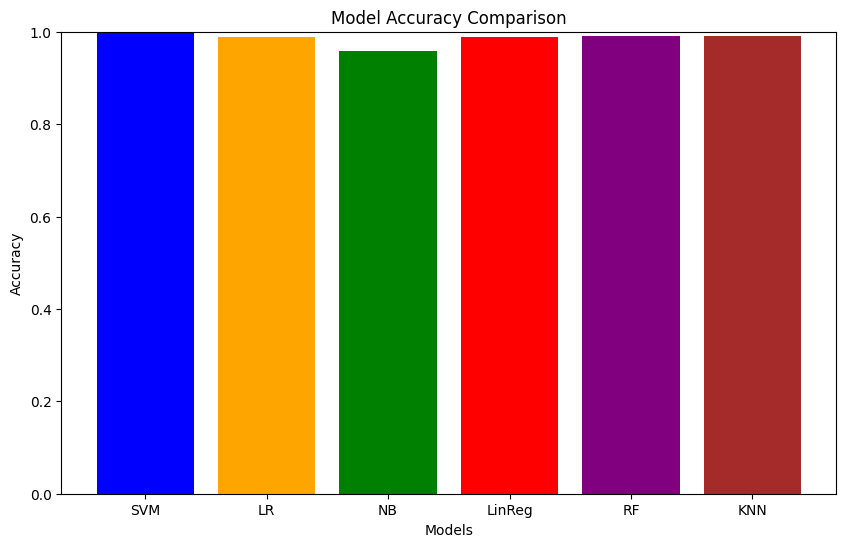

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy_dict = {"SVM": accuracy_svm, # Support Vector Machine
                 "LR": accuracy_lor,  # Logistic Regression
                 "NB": accuracy,  # Naive Bayes
                 "LinReg": accuracy_lr,  # Linear Regression
                 "RF": accuracy_rf,  # Random Forest
                 "KNN": accuracy_knn}  # K-Nearest Neighbors

plt.figure(figsize=(10, 6))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

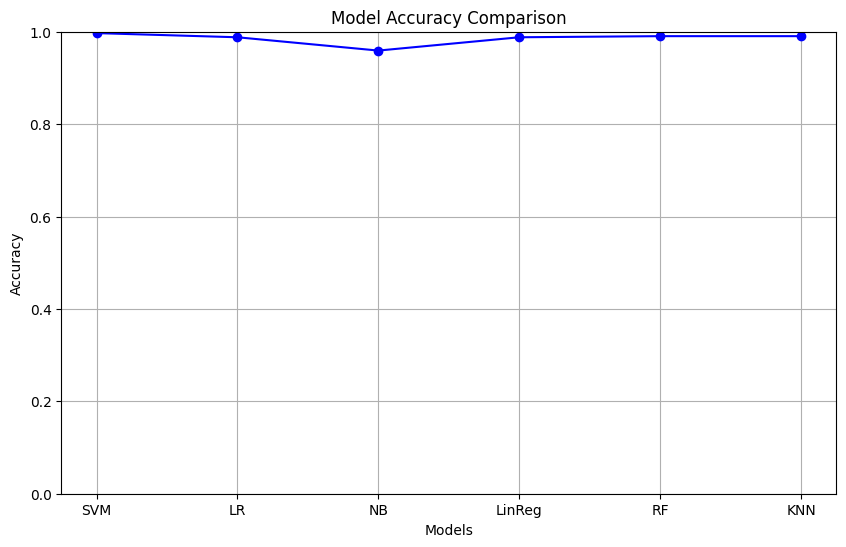

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_dict.keys(), accuracy_dict.values(), marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)
plt.show()